In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt


In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)


In [5]:
classLabels=[]
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##To maintain the scaling of the image
model.setInputMean((127.5,127.5,127.5)) ##mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000026B28A66010>

To Read an image

In [9]:
img=cv2.imread('man_bmw.jpg')

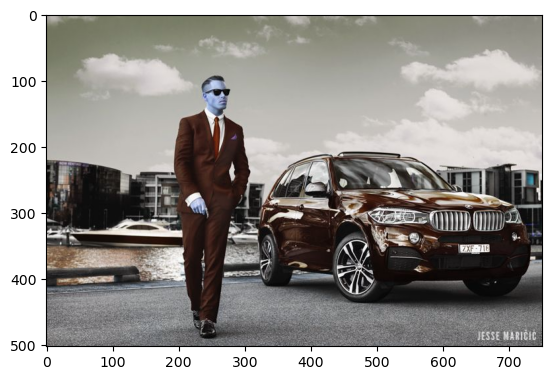

In [10]:
plt.imshow(img) ##BGR image

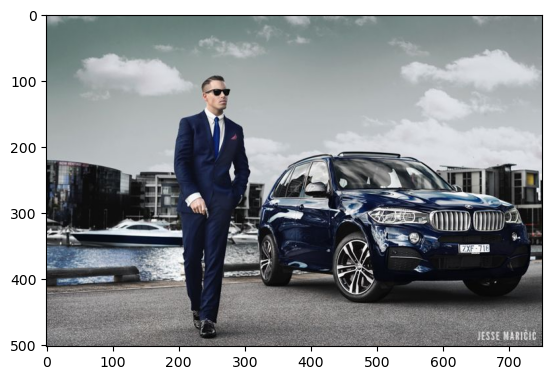

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) ##To convert into RGB image

In [12]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5) ##Threshold is used to provide accurate clarity of the image

In [13]:
print(ClassIndex)

[3 1]


In [14]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):##zip is used because 3 different variables are used
    cv2.rectangle(img,boxes,(255,0,0),2) ##rectangle color is blue because it reprensents bgr
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

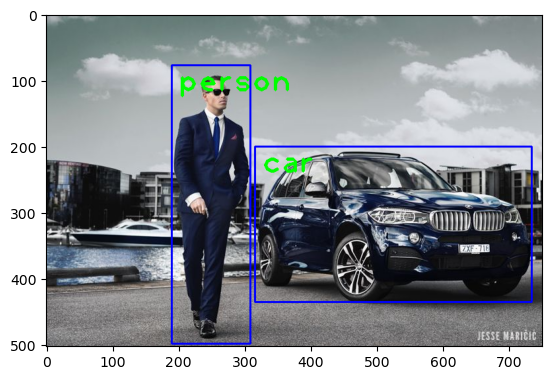

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
cap=cv2.VideoCapture("video1.mp4")
##To check if video is working properly or not
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")


font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)##To avoid the video to crash
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow("Object Detection",frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.realease()
cv2.destroyAllWindows()


[ 3  3 10  1  8]
[ 3  3 10  1  8]
[ 3  3 10  8  1]
[ 3  3 10  8  1]
[ 3  3 10  8  1]
[ 3  3 10  8]
[ 3  3 10  8]
[ 3  3 10  8]
[ 3  3 10  8]
[ 3  3 10  3  8  3]
[ 3  3 10  3  8]
[ 3  3  3 10  8]
[ 3  3  3 10  8]
[ 3  3 10  3  8  3]
[ 3  3  3 10  8  3]
[ 3 10  3  8  3  3]
[ 3 10  8  3  3  3]
[ 3 10  3  8  3  3]
[ 3 10  8  3  3  3]
[ 3 10  3  8  3  3]
[ 3 10  8  3  3]
[ 3 10  8  3  3  3]
[ 3 10  8  3  3  3]
[ 3  8 10  3  3  3]
[ 3 10  8  3  3]
[ 3 10  8  3  3  3]
[ 3 10  8  3  3  3]
[ 3 10  8  3  3  3]
[ 3  8 10  3  3  1  3]
[ 3  8 10  3  3  1  3]
[ 3 10  8  3  1  3  3  1]
[ 3 10  8  3  1  3  3]
[ 3 10  3  8  3  1  3]
[ 3 10  3  8  1  3  3  1]
[ 3 10  3  1  8  3  3  1  1]
[ 3 10  3  1  8  3  1  3  1]
[ 3 10  8  3  1  3  3  1  1]
[ 3 10  8  3  1  1  3  3  1]
[ 3 10  1  1  3  8  3  3  1]
[ 3  1 10  1  3  8  1  3  3]
[ 3  1 10  1  3  1  8  3  3  1]
[ 3  1 10  1  3  1  8  3  3  1  1]
[ 3 10  1  8  3  1  3  3  1]
[ 3 10  3  1  1  8  3  3  1]
[ 3 10  3  1  8  1  3  3  1]
[ 3 10  3  8  1  3  3 

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
cap=cv2.VideoCapture(1)
##To check if video is working properly or not
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")


font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)##To avoid the video to crash
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow("Object Detection",frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.realease()
cv2.destroyAllWindows()


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
()
[75 77  1]
[75 77]
[77  1 75]
[77  1 75]
[77  1 75]
[77 75  1]
[77 75  1]
[77 75  1]
[ 1 77 75]
[77  1 75]
[77  1]
[77  1]
[ 1 77 75]
[ 1 77 75]
[ 1 77]
[1]
[ 1 75 77]
[1]
[1]
[75  1]
[77  1 75]
[75 77  1]
[ 1 75 77]
[75  1]
[77  1]
[77  1]
[77  1]
[75  1]
[77  1]
[ 1 75]
[ 1 75]
[75  1]
[77  1]
[75  1]
[75  1]
[75  1]
[75  1]
[75]
[75  1]
[75  1]
[75]
[75  1]
[75  1]
[75  1]
[75  1]
[75  1]
[75  1]
[ 1 75]
[ 1 75]
[ 1 75]
[ 1 75]
[ 1 77]
[77  1]
[1 1]
[1]
[77 77]
[77 77]
[77 77]
[77]
[77]
[77]
[77]
[77]
[77]
[77 77]
[77  1]
[77  1]
[77  1]
[77  1 